Question No 2 Solution

In [18]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from math import pi


In [19]:
## Reading the samptimes data
file = open('samptimes.csv')
samptimes = csv.reader(file)


stimes=[]
for row in samptimes:
    stimes.append(row[0])

file.close()

## Reading the y data
file = open('y.csv')
y = csv.reader(file)

Ydata=[]

for row in y:
    Ydata.append(row[0])
file.close()

In [20]:
## Converting the data to numpy array
stimes = np.asfarray(stimes)
X = np.asfarray(stimes).reshape([stimes.size,1])
print("X.shape =  ",X.shape)
Y = np.asfarray(Ydata).reshape([X.shape[0],1])
print("Y.shape = ",Y.shape)


X.shape =   (259, 1)
Y.shape =  (259, 1)


Plotting the raw data

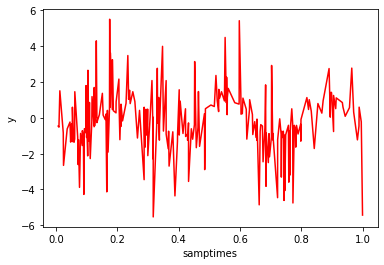

In [22]:
plt.plot(X,Y,'r')
plt.xlabel('samptimes')
plt.ylabel('y')
plt.show()


"A" matrix generation:-
i used vectorized implementation to produce matrix A (without the for loops).
Numpy operations are way more faster than for loops

In [23]:

def matrix_producer(time_samples, N):
	B=np.int64((N-1)/2)
	B_mat= np.linspace(-B, B, 2*B+1).reshape([2*B+1,1]).T
	#vectorized implementation to generate matrix A
	A = np.exp(np.dot(time_samples,B_mat)*2*pi*1j)
	return A


In [24]:
A = matrix_producer(X,21)    #here X is the samp_times vector
fourier_coeff=np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,Y))


In [25]:
y_pred= np.dot(A,fourier_coeff)

C:\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


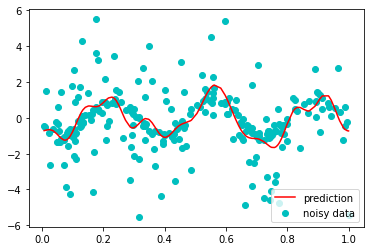

In [30]:
y_pred= (y_pred)
plt.plot(X,y_pred, color = 'r')
plt.scatter(X,Y, color = 'c')
plt.legend(["prediction", "noisy data"], loc ="lower right")
plt.show()